In [1]:
import matplotlib as mpl
from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from csv import reader
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings, os, random, time
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_process import arma_generate_sample, ArmaProcess
sns.set_palette({'#30a2da',"#fc4f30","#e5ae38", "#6d904f", "#8b8b8b"})
import folium
from sklearn.cluster import KMeans
from selenium import webdriver

D:\LANGUAGE\Anaconda3.5\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
from mpl_toolkits.basemap import Basemap # 如果报错为"PROJ_LIB"时，可以参考下面链接
# http://liyangbit.com/pythonvisualization/basemap-install/

### Load Data

In [3]:
crimes = pd.read_csv("D:\\PSU\\8thLaiOfferProjects\\02172019DSHomework01\\Police_Department_Incident_Reports__Historical_2003_to_May_2018total.csv")
# dir_path = os.path.dirname(os.path.realpath(__file__))
# crimes = pd.read_csv(os.getcwd()+'\\Police_Department_Incident_Reports__Historical_2003_to_May_2018total.csv')


In [4]:
crimes.head(20)

IncidntNum         Category                                   Descript  \
0    150060275     NON-CRIMINAL                              LOST PROPERTY   
1    150098210          ROBBERY                      ROBBERY, BODILY FORCE   
2    150098210          ASSAULT       AGGRAVATED ASSAULT WITH BODILY FORCE   
3    150098210  SECONDARY CODES                          DOMESTIC VIOLENCE   
4    150098226        VANDALISM  MALICIOUS MISCHIEF, VANDALISM OF VEHICLES   
5    150098232     NON-CRIMINAL       AIDED CASE -PROPERTY FOR DESTRUCTION   
6    150098248  SECONDARY CODES                          DOMESTIC VIOLENCE   
7    150098248        VANDALISM              MALICIOUS MISCHIEF, VANDALISM   
8    150098254         BURGLARY          BURGLARY OF STORE, UNLAWFUL ENTRY   
9    150098260    LARCENY/THEFT                    PETTY THEFT SHOPLIFTING   
10   150098345    LARCENY/THEFT                    PETTY THEFT SHOPLIFTING   
11   150098345    DRUG/NARCOTIC             POSSESSION OF METH-AMPHETAMINE   
12   150098345    DRUG/NARCOTIC      POSSESSION OF NARCOTICS PARAPHERNALIA   
13   150098345         WARRANTS                             WARRANT ARREST   
14   150098367          ROBBERY                ROBBERY, ARMED WITH A KNIFE   
15   150098373    VEHICLE THEFT                          STOLEN AUTOMOBILE   
16   150098373     NON-CRIMINAL                             FOUND PROPERTY   
17   150098389         WARRANTS            ENROUTE TO OUTSIDE JURISDICTION   
18   150098395    LARCENY/THEFT               PETTY THEFT FROM LOCKED AUTO   
19   150098408   OTHER OFFENSES      DRIVERS LICENSE, SUSPENDED OR REVOKED   

   DayOfWeek        Date   Time  PdDistrict      Resolution  \
0     Monday  01/19/2015  14:00     MISSION            NONE   
1     Sunday  02/01/2015  15:45  TENDERLOIN            NONE   
2     Sunday  02/01/2015  15:45  TENDERLOIN            NONE   
3     Sunday  02/01/2015  15:45  TENDERLOIN            NONE   
4    Tuesday  01/27/2015  19:00    NORTHERN            NONE   
5     Sunday  02/01/2015  16:21    RICHMOND            NONE   
6   Saturday  01/31/2015  21:00     BAYVIEW            NONE   
7   Saturday  01/31/2015  21:00     BAYVIEW            NONE   
8   Saturday  01/31/2015  16:09     CENTRAL            NONE   
9   Saturday  01/31/2015  17:00     CENTRAL            NONE   
10    Sunday  02/01/2015  14:00     MISSION  ARREST, BOOKED   
11    Sunday  02/01/2015  14:00     MISSION  ARREST, BOOKED   
12    Sunday  02/01/2015  14:00     MISSION  ARREST, BOOKED   
13    Sunday  02/01/2015  14:00     MISSION  ARREST, BOOKED   
14    Sunday  02/01/2015  16:20     MISSION            NONE   
15    Sunday  02/01/2015  12:45    NORTHERN            NONE   
16    Sunday  02/01/2015  12:45    NORTHERN            NONE   
17    Sunday  02/01/2015  16:38     BAYVIEW  ARREST, BOOKED   
18    Sunday  02/01/2015  14:30        PARK            NONE   
19    Sunday  02/01/2015  17:25     BAYVIEW  ARREST, BOOKED   

                                Address           X          Y  \
0                 18TH ST / VALENCIA ST -122.421582  37.761701   
1           300 Block of LEAVENWORTH ST -122.414406  37.784191   
2           300 Block of LEAVENWORTH ST -122.414406  37.784191   
3           300 Block of LEAVENWORTH ST -122.414406  37.784191   
4                LOMBARD ST / LAGUNA ST -122.431119  37.800469   
5                400 Block of LOCUST ST -122.451782  37.787085   
6              700 Block of KIRKWOOD AV -122.374019  37.729203   
7              700 Block of KIRKWOOD AV -122.374019  37.729203   
8              200 Block of STOCKTON ST -122.406568  37.787809   
9                 800 Block of GEARY ST -122.417295  37.786258   
10            1700 Block of HARRISON ST -122.413354  37.769075   
11            1700 Block of HARRISON ST -122.413354  37.769075   
12            1700 Block of HARRISON ST -122.413354  37.769075   
13            1700 Block of HARRISON ST -122.413354  37.769075   
14              2200 Block of MARKET ST -122.432198

In [5]:
crimes.shape

(2215024, 13)

In [6]:
crimes.describe()

IncidntNum             X             Y          PdId
count  2.215024e+06  2.215024e+06  2.215024e+06  2.215024e+06
mean   1.040728e+08 -1.224229e+02  3.777076e+01  1.040728e+13
std    4.612827e+07  2.983459e-02  4.203596e-01  4.612827e+12
min    3.979000e+03 -1.225136e+02  3.770788e+01  3.979630e+08
25%    6.124170e+07 -1.224332e+02  3.775302e+01  6.124170e+12
50%    1.011558e+08 -1.224166e+02  3.777542e+01  1.011558e+13
75%    1.409256e+08 -1.224069e+02  3.778448e+01  1.409256e+13
max    9.915824e+08 -1.205000e+02  9.000000e+01  9.915824e+13

### Group Crime by Category

In [7]:
category_count=pd.DataFrame(crimes.groupby("Category").size().sort_values(ascending=False).rename("counts").reset_index())
category_count.head(20)

Category  counts
0            LARCENY/THEFT  480448
1           OTHER OFFENSES  309358
2             NON-CRIMINAL  238323
3                  ASSAULT  194694
4            VEHICLE THEFT  126602
5            DRUG/NARCOTIC  119628
6                VANDALISM  116059
7                 WARRANTS  101379
8                 BURGLARY   91543
9           SUSPICIOUS OCC   80444
10          MISSING PERSON   64961
11                 ROBBERY   55867
12                   FRAUD   41542
13         SECONDARY CODES   25831
14  FORGERY/COUNTERFEITING   23050
15             WEAPON LAWS   22234
16                TRESPASS   19449
17            PROSTITUTION   16701
18         STOLEN PROPERTY   11891
19  SEX OFFENSES, FORCIBLE   11742

In [8]:
# This will take very long time. But, this can be done in Spark quickly.
# sns.distplot(crimes.Category, vertical=True, kde=None, color='g')

### Geodata Visualization
** Due to the very large size of the data set (2M+), I will take a random sampling to select 10% data.

In [10]:
print(crimes.X.max(), crimes.X.min(), crimes.Y.max(), crimes.Y.min())
# we found there are outliers (Latitude is 90.)
# So, I will select a rectangle area to define San Francisco Area.

-120.5 -122.513642064 90.0 37.7078790224


In [13]:
smallcrimes = crimes.loc[(crimes.X > -123) & (crimes.X < -119) & (crimes.Y < 38) & (crimes.Y > 37)]
rows = list(range(len(smallcrimes)))
selected_rows = random.sample(rows, len(rows)//10)
smallcrime = smallcrimes.iloc[selected_rows,:]
smallcrime.shape

(221488, 13)

### Visualization

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=1600686.6479998967,974873.2225408414,1616224.3407007055,988948.8982484965&bboxSR=2770&imageSR=2770&size=1500,1358&dpi=96&format=png32&transparent=true&f=image


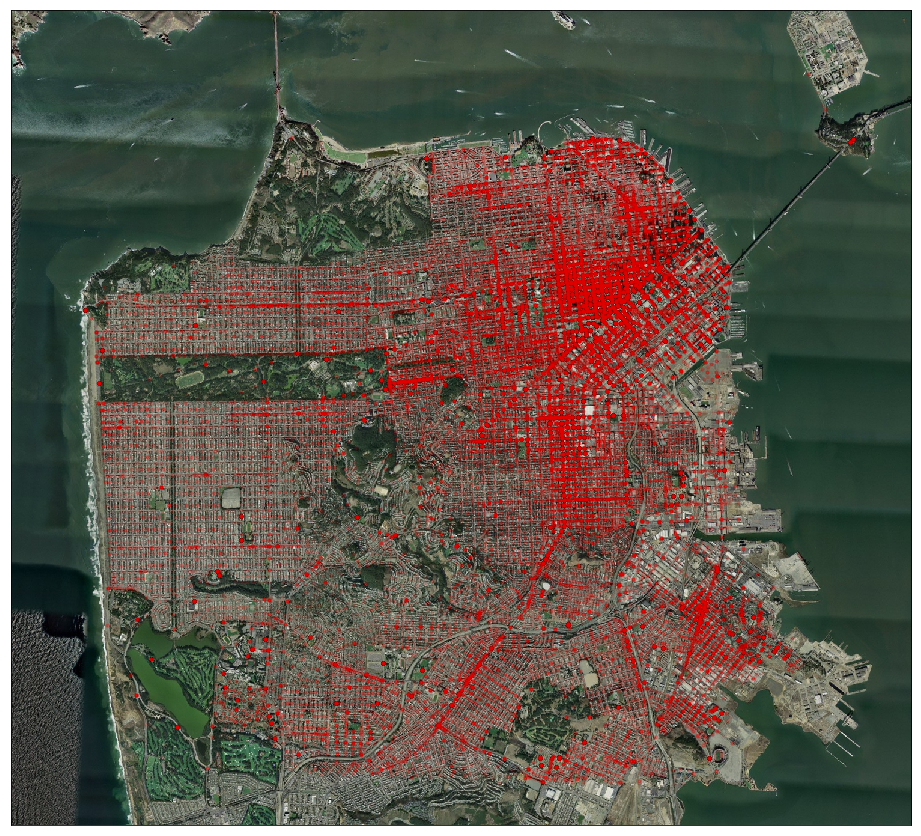

In [14]:
# Next, simply visuzlize crime frequency without categorize the type of crime
m = Basemap(projection='mill', llcrnrlat=smallcrime.Y.min()-0.01,
            urcrnrlat=smallcrime.Y.max()+0.01,
            llcrnrlon=smallcrime.X.min()-.01,
            urcrnrlon=smallcrime.X.max()+.01, resolution="c",
            epsg=2770)
x,y = m(tuple(smallcrime.X[(smallcrime.X.isnull()==False)]), 
        tuple(smallcrime.Y[(smallcrime.Y.isnull()==False)]))
plt.figure(figsize=(20,15))
m.arcgisimage(service="ESRI_Imagery_World_2D",xpixels=1500,verbose=True)
m.plot(x,y,'ro',markersize=3,alpha=0.03,color="red")
plt.savefig('foo1.png')
# NatGeo_World_Map

#### Visuzalize Assault Crime Frequency

In [15]:
assault = smallcrimes['Category']=='ASSAULT'
dfassault = smallcrimes[assault]
# dfassault.head(10)
remove = dfassault.index[dfassault['Y'] == 90].tolist()

dfassault = dfassault.drop(remove)
dfassault.Y.describe()

count    194685.000000
mean         37.763810
std           0.025546
min          37.707879
25%          37.743538
50%          37.772313
75%          37.783570
max          37.819975
Name: Y, dtype: float64

http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/export?bbox=1600686.4336097192,974868.4619853821,1616108.504731585,986657.1335060897&bboxSR=2770&imageSR=2770&size=1500,1146&dpi=96&format=png32&transparent=true&f=image


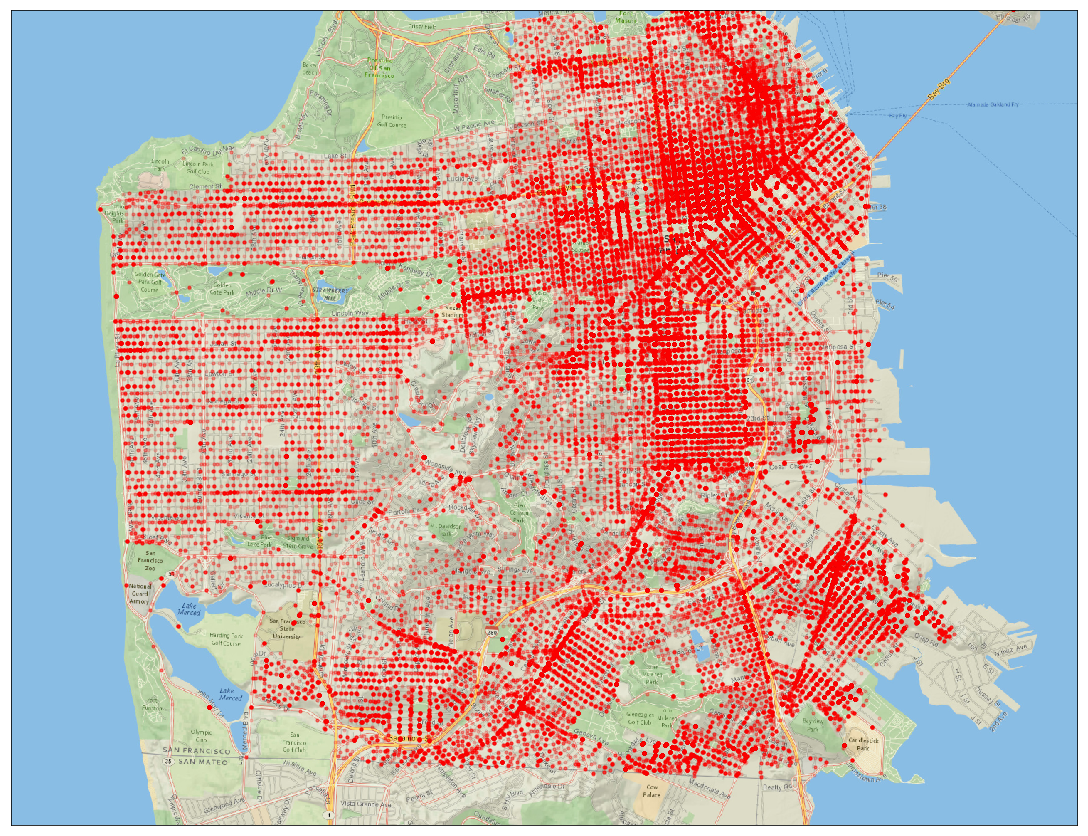

In [16]:
m = Basemap(projection='mill',llcrnrlat=dfassault.Y.min()-0.01,
            urcrnrlat=dfassault.Y.max()-.01,
            llcrnrlon=dfassault.X.min()-.01,
            urcrnrlon=dfassault.X.max()+.01, resolution="c",
            epsg=2770)

x,y = m(tuple(dfassault.X[(dfassault.X.isnull()==False)]), 
        tuple(dfassault.Y[(dfassault.Y.isnull()==False)]))
plt.figure(figsize=(20,15))
m.arcgisimage(service="NatGeo_World_Map",xpixels=1500,verbose=True)
m.plot(x,y,'ro',markersize=3,alpha=0.2,color="red")
plt.savefig('foo.png')

#### Intuitively, we found the northeastern area has probably higher frequency.

### Group Assault crimes by different district

In [17]:
counts = dfassault.groupby('PdDistrict').count()
means = dfassault.groupby('PdDistrict').mean()
X = means.X.to_frame().reset_index()
Y = means.Y.to_frame().reset_index()
counts = counts.IncidntNum.to_frame().reset_index()
location = pd.merge(X, Y, on="PdDistrict")
dfheat = pd.merge(location, counts, on="PdDistrict")
dfheat

PdDistrict           X          Y  IncidntNum
0     BAYVIEW -122.392148  37.734955       24809
1     CENTRAL -122.409663  37.795317       17608
2   INGLESIDE -122.427285  37.724534       21970
3     MISSION -122.419033  37.759495       28791
4    NORTHERN -122.426064  37.785329       21057
5        PARK -122.445111  37.770124        8637
6    RICHMOND -122.472209  37.780044        7855
7    SOUTHERN -122.405735  37.779971       31314
8     TARAVAL -122.476928  37.736897       13732
9  TENDERLOIN -122.412825  37.783716       18912

In [18]:
# Tutorial from Github:
# https://github.com/python-visualization/folium/blob/master/examples/Heatmap.ipynb
# https://nbviewer.jupyter.org/github/python-visualization/folium_contrib/tree/master/notebooks/
# https://alcidanalytics.com/p/geographic-heatmap-in-python
# https://towardsdatascience.com/data-101s-spatial-visualizations-and-analysis-in-python-with-folium-39730da2adf
    
location = dfassault[['X','Y','Category','IncidntNum']]
location.head(10)
location.shape

from folium.plugins import HeatMap

ma = folium.Map([dfheat.Y.mean(), dfheat.X.mean()], 
                tiles='OpenStreetMap', zoom_start=12.4)
# stamentoner
# OpenStreetMap

dfheatmap = dfheat.drop(columns=['PdDistrict'])
HeatMap(list(zip(dfheat.Y, dfheat.X, dfheat.IncidntNum)),
       min_opacity=.2,
       max_val = dfheat.IncidntNum.max(),
       radius=20, blur=25,
       max_zoom=10,
       ).add_to(ma)
ma

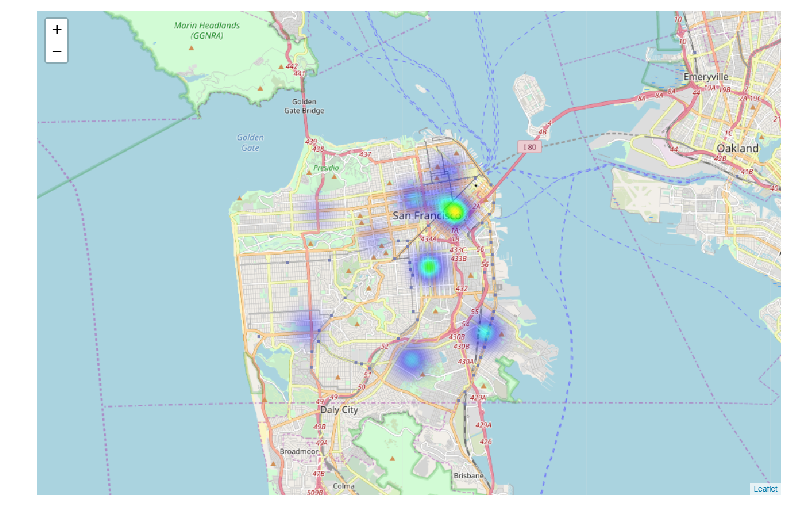

In [19]:
# The above cell should give us a heat map that can be zoomed in and out. Due to some reasons, it can not be displayed on Github.
# So, this cell will show a screenshot of the above heat map (regretfully, can not be zoomed)
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
delay=10
fn='testmap.html'
tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fn)
ma.save(fn)

browser = webdriver.Chrome()   # here you can change the browser
browser.get(tmpurl)
#Give the map tiles some time to load
time.sleep(delay)
browser.save_screenshot('map.png')

# To show what the result looks like, I'll show below:
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
img = mpimg.imread('map.png')
plt.imshow(img)
plt.axis('off')
plt.show()

### Heat Map with Slider

In [20]:
smallcrimes.datetimes1 = pd.to_datetime(smallcrimes.Date, format='%m/%d/%Y')
smallcrimes.datetimes2 = pd.to_datetime(smallcrimes.Time, format='%H:%M')
smallcrimes['month'] = smallcrimes.datetimes1.apply(lambda x:x.month)
smallcrimes['day'] = smallcrimes.datetimes1.apply(lambda x:x.day)
smallcrimes['year'] = smallcrimes.datetimes1.apply(lambda x:x.year)
smallcrimes['hour'] = smallcrimes.datetimes2.apply(lambda x:x.hour)
smallcrimes['minute'] = smallcrimes.datetimes2.apply(lambda x:x.minute)

D:\LANGUAGE\Anaconda3.5\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
D:\LANGUAGE\Anaconda3.5\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
D:\LANGUAGE\Anaconda3.5\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\LANGUAGE\Anaconda3.5\lib\site-packages\ipykernel_launcher.py:4: 

In [21]:
smallcrimes.head(15)

IncidntNum         Category                                   Descript  \
0    150060275     NON-CRIMINAL                              LOST PROPERTY   
1    150098210          ROBBERY                      ROBBERY, BODILY FORCE   
2    150098210          ASSAULT       AGGRAVATED ASSAULT WITH BODILY FORCE   
3    150098210  SECONDARY CODES                          DOMESTIC VIOLENCE   
4    150098226        VANDALISM  MALICIOUS MISCHIEF, VANDALISM OF VEHICLES   
5    150098232     NON-CRIMINAL       AIDED CASE -PROPERTY FOR DESTRUCTION   
6    150098248  SECONDARY CODES                          DOMESTIC VIOLENCE   
7    150098248        VANDALISM              MALICIOUS MISCHIEF, VANDALISM   
8    150098254         BURGLARY          BURGLARY OF STORE, UNLAWFUL ENTRY   
9    150098260    LARCENY/THEFT                    PETTY THEFT SHOPLIFTING   
10   150098345    LARCENY/THEFT                    PETTY THEFT SHOPLIFTING   
11   150098345    DRUG/NARCOTIC             POSSESSION OF METH-AMPHETAMINE   
12   150098345    DRUG/NARCOTIC      POSSESSION OF NARCOTICS PARAPHERNALIA   
13   150098345         WARRANTS                             WARRANT ARREST   
14   150098367          ROBBERY                ROBBERY, ARMED WITH A KNIFE   

   DayOfWeek        Date   Time  PdDistrict      Resolution  \
0     Monday  01/19/2015  14:00     MISSION            NONE   
1     Sunday  02/01/2015  15:45  TENDERLOIN            NONE   
2     Sunday  02/01/2015  15:45  TENDERLOIN            NONE   
3     Sunday  02/01/2015  15:45  TENDERLOIN            NONE   
4    Tuesday  01/27/2015  19:00    NORTHERN            NONE   
5     Sunday  02/01/2015  16:21    RICHMOND            NONE   
6   Saturday  01/31/2015  21:00     BAYVIEW            NONE   
7   Saturday  01/31/2015  21:00     BAYVIEW            NONE   
8   Saturday  01/31/2015  16:09     CENTRAL            NONE   
9   Saturday  01/31/2015  17:00     CENTRAL            NONE   
10    Sunday  02/01/2015  14:00     MISSION  ARREST, BOOKED   
11    Sunday  02/01/2015  14:00     MISSION  ARREST, BOOKED   
12    Sunday  02/01/2015  14:00     MISSION  ARREST, BOOKED   
13    Sunday  02/01/2015  14:00     MISSION  ARREST, BOOKED   
14    Sunday  02/01/2015  16:20     MISSION            NONE   

                        Address           X          Y  \
0         18TH ST / VALENCIA ST -122.421582  37.761701   
1   300 Block of LEAVENWORTH ST -122.414406  37.784191   
2   300 Block of LEAVENWORTH ST -122.414406  37.784191   
3   300 Block of LEAVENWORTH ST -122.414406  37.784191   
4        LOMBARD ST / LAGUNA ST -122.431119  37.800469   
5        400 Block of LOCUST ST -122.451782  37.787085   
6      700 Block of KIRKWOOD AV -122.374019  37.729203   
7      700 Block of KIRKWOOD AV -122.374019  37.729203   
8      200 Block of STOCKTON ST -122.406568  37.787809   
9         800 Block of GEARY ST -122.417295  37.786258   
10    1700 Block of HARRISON ST -122.413354  37.769075   
11    1700 Block of HARRISON ST -122.413354  37.769075   
12    1700 Block of HARRISON ST -122.413354  37.769075   
13    1700 Block of HARRISON ST -122.413354  37.769075   
14      2200 Block of MARKET ST -122.432198  37.765111   

                                 Location            PdId  month  day  year  \
0    (37.7617007179518, -122.42158168137)  15006027571000      1   19  2015   
1   (37.7841907151119, -122.414406029855)  15009821003074      2    1  2015   
2   (37.7841907151119, -122.414406029855)  15009821004014      2    1  2015   
3   (37.7841907151119, -122.414406029855)  15009821015200      2    1  2015   
4   (37.8004687042875, -122.431118543788)  15009822628160      1   27  2015   
5   (37.7870853907529, -122.451781767894)  15009823251041      2    1  2015   
6    (37.729203356539, -122.374019331833)  15009824815200      1   31  2015   
7    (37.729203356539, -122.374019331833)  15009824828150      1   31  2015   
8    (37.7878092959561, -122.40656817787)  15009825405053      1   31  2015   
9   (37.7862578545865, -122

In [22]:
# define a function to generate map
def generateBaseMap(default_location=[smallcrimes.Y.mean(), smallcrimes.X.mean()], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [23]:
base_map = generateBaseMap()
base_map # show the geographical map
# states = folium.Map()
# states.create_map(path='gov_share.html')
# HTML('<iframe src=gov_chare.html width=970 height=510></iframe>')

In [24]:
from folium.plugins import HeatMap
counts = smallcrimes.sample(frac=0.01, replace=True, random_state=1).groupby(['Y','X']).count()['IncidntNum']
# 这里为什么要做一次 sampling？ 因为 crimes这个数据集有2000000+的数据，量太大，
# 导致之后的 add_to 函数崩溃。多次尝试发现上线大概在 20000 左右（可能更高）
# 所以对 crimes 样本做了有放回的 抽样，抽样数量为 1%

counts = counts.to_frame().reset_index()
counts.head()
counts.shape

# remove outliers ( latitude == 90)
remove = counts.index[counts['Y'] == 90].tolist()
counts = counts.drop(remove)
counts.Y.describe()

base_map = generateBaseMap()
HeatMap(counts.values.tolist(),
       min_opacity=.2,
       max_val = counts.IncidntNum.max(),
       radius=20, blur=25,
       max_zoom=10,
       ).add_to(base_map)
base_map

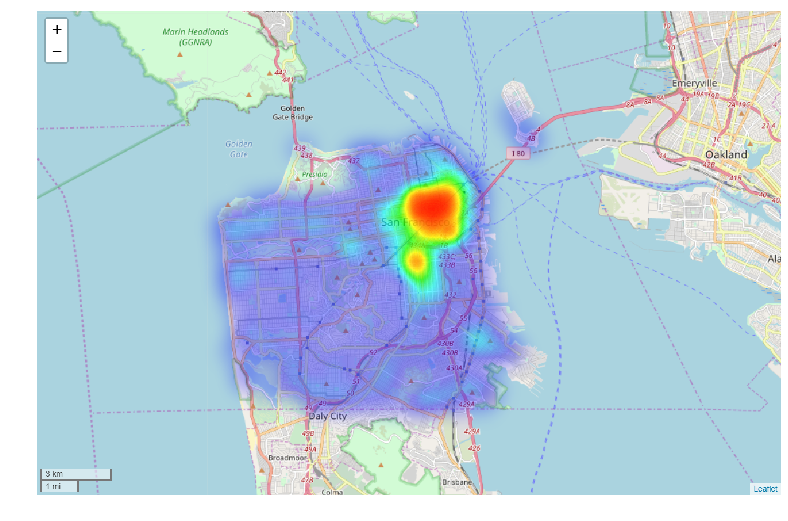

In [25]:
delay=7
fn='testmap.html'
tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fn)
base_map.save(fn)

browser = webdriver.Chrome()   # here you can change the browser
browser.get(tmpurl)
#Give the map tiles some time to load
time.sleep(delay)
browser.save_screenshot('map2.png')

figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
img = mpimg.imread('map2.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [26]:
df_hour_list = []
for hour in smallcrimes.hour.sort_values().unique():
    df_hour_list.append(smallcrimes.loc[smallcrimes.hour == hour, 
                                   ['Y','X']].groupby(['Y','X']).sum().reset_index().values.tolist())

In [29]:
from folium.plugins import HeatMapWithTime
basemap_time = generateBaseMap(default_zoom_start=11)
HeatMapWithTime(df_hour_list, radius=5,
                gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'}, 
                min_opacity=0.5, 
                max_opacity=0.8, 
                use_local_extrema=True).add_to(base_map)
base_map

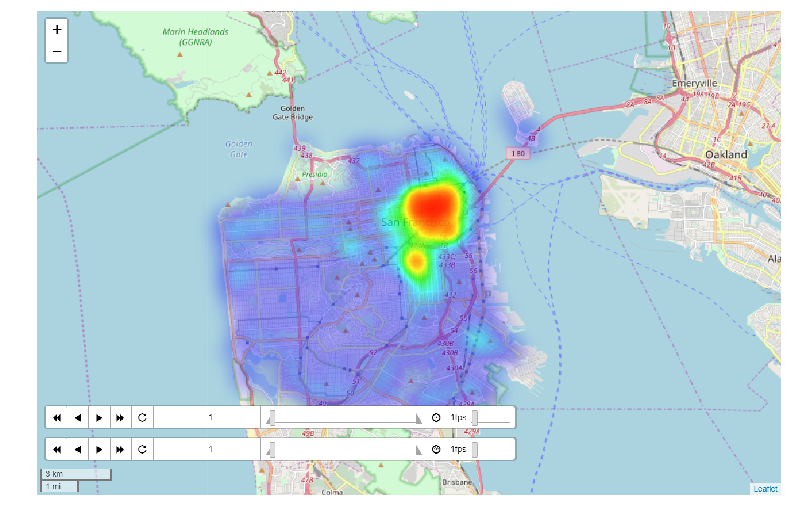

In [30]:
delay=7
fn='testmap.html'
tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fn)
base_map.save(fn)

browser = webdriver.Chrome()   # here you can change the browser
browser.get(tmpurl)
#Give the map tiles some time to load
time.sleep(delay)
browser.save_screenshot('map3.png')

figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
img = mpimg.imread('map3.png')
plt.imshow(img)
plt.axis('off')
plt.show()